map projections, CRS, basics of Geopandas

In [14]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib.pyplot as plt

Resources:

- source for World borders https://www.geobounaries.org/
    https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.zip
    - comment: https://twitter.com/gontsa/status/1459617768651857924?s=20

- EPSG website: https://epsg.io/

In [15]:
import os
os.chdir(r'd:\git20\GeoPython_Ukraine2024')

In [16]:
url = 'https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.zip'

In [17]:
import requests, zipfile, io
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [18]:
z.namelist()

['geoBoundariesCGAZ_ADM0.shp',
 'geoBoundariesCGAZ_ADM0.shx',
 'geoBoundariesCGAZ_ADM0.dbf',
 'geoBoundariesCGAZ_ADM0.prj']

In [19]:
# read data about the countries
# r'd:\GIS\2024_workshops\geoBoundariesCGAZ_ADM0.shp'

gdf_countries = gpd.read_file(z.namelist()[0])

In [20]:
gdf_countries.head(5)

,shapeGroup,shapeType,shapeName,geometry
0,AFG,ADM0,Afghanistan,"POLYGON ((74.88986 37.23409, 74.88962 37.23314..."
1,GBR,ADM0,United Kingdom,"MULTIPOLYGON (((33.01302 34.64377, 33.01275 34..."
2,ALB,ADM0,Albania,"POLYGON ((20.07889 42.55580, 20.07928 42.55546..."
3,DZA,ADM0,Algeria,"POLYGON ((8.64194 36.94096, 8.64195 36.94070, ..."
4,USA,ADM0,United States,"MULTIPOLYGON (((-168.15791 -14.53181, -168.161..."


In [21]:
gdf_countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shapeGroup  218 non-null    object  
 1   shapeType   218 non-null    object  
 2   shapeName   218 non-null    object  
 3   geometry    218 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 6.9+ KB


In [22]:
gdf_countries.crs
# slides

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

C:\Users\Airly\AppData\Local\Temp\ipykernel_5520\3130864076.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_countries.geometry.centroid.plot()


<Axes: >

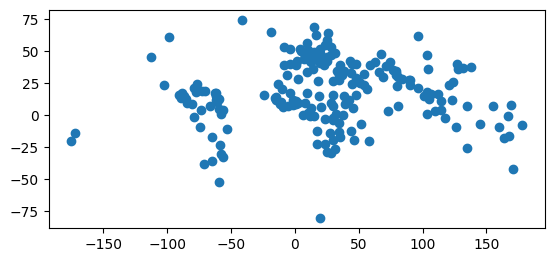

In [23]:
gdf_countries.total_bounds
gdf_countries.geometry.centroid.plot()

In [24]:
# geometry access 
gdf_countries.geometry

0      POLYGON ((74.88986 37.23409, 74.88962 37.23314...
1      MULTIPOLYGON (((33.01302 34.64377, 33.01275 34...
2      POLYGON ((20.07889 42.55580, 20.07928 42.55546...
3      POLYGON ((8.64194 36.94096, 8.64195 36.94070, ...
4      MULTIPOLYGON (((-168.15791 -14.53181, -168.161...
                             ...                        
213    MULTIPOLYGON (((34.69143 27.95899, 34.69176 27...
214    POLYGON ((123.47986 25.75070, 123.48736 25.749...
215    POLYGON ((114.33955 11.44331, 114.33958 11.440...
216    POLYGON ((35.55500 32.38936, 35.55517 32.38919...
217    POLYGON ((-8.66761 27.66727, -8.66761 27.62671...
Name: geometry, Length: 218, dtype: geometry

In [25]:
# Simple plot - Eqirctangular projection
gdf_countries.to_crs.plot()

AttributeError: 'function' object has no attribute 'plot'

In [ ]:
gdf_countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

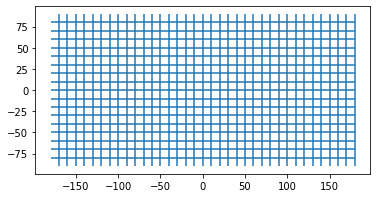

In [ ]:
# (r'.\data\graticules_10.shp')
gdf_graticules = gpd.read_file(r'data\graticules_10.shp')
gdf_graticules.plot()

Text(0.5, 1.0, 'WGS84')

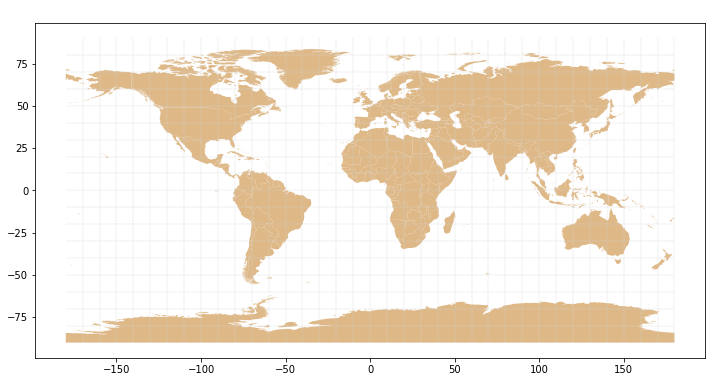

In [ ]:
# overlay - fig and ax objects

fig, ax = plt.subplots(figsize=(12,10))
gdf_countries.plot(ax=ax, color='burlywood')
gdf_graticules.plot(ax=ax, color='lightgray', linewidth=0.3)
plt.title('Eqiurectangular projection', color='black')
# ax.axis('off')

In [ ]:
# equirectangular projection cons - distortions, units
gdf_countries.geometry.area.sum()

C:\Users\Airly\AppData\Local\Temp/ipykernel_18744/428466332.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_countries.geometry.area.sum()


21432.176517135034

265588153.58657444

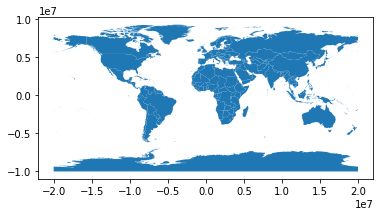

In [ ]:
# units fix EPSG:32662 - Platte Carre  - just changing the units
gdf_countries.to_crs('EPSG:32662').plot()
gdf_countries.to_crs('EPSG:32662').geometry.area.sum() /1_000_000

Mercator projection 'EPSG:3857'

(-22041259.17706817, 22041259.17706818, -266781549.038117, 266781549.038117)

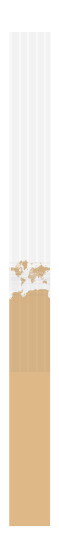

In [ ]:
epsg = 'EPSG:3857'
gdf_world_mercator = gdf_countries.to_crs(epsg)
graticules_mercator = gdf_graticules.to_crs(epsg)

fig, ax = plt.subplots(figsize=(12,10))
gdf_world_mercator.plot(ax=ax, color='burlywood')
graticules_mercator.plot(ax=ax, color='gray', linewidth=0.1)
ax.axis('off')

Text(0.5, 1.0, 'World Mercator Projection')

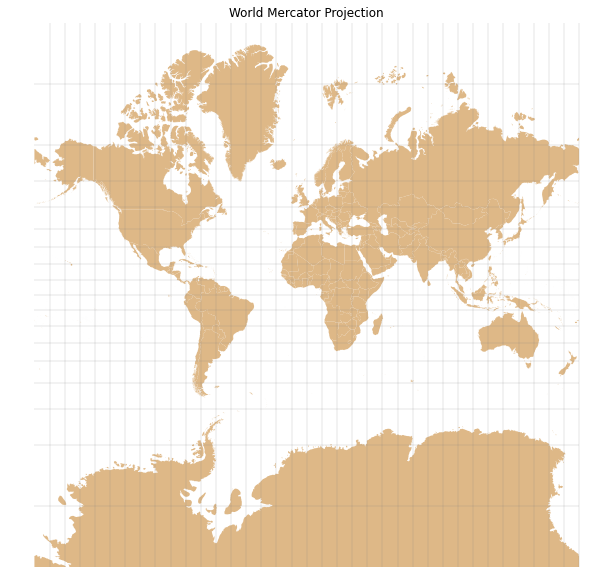

In [ ]:
# Mercator projection truncated

gdf_world_mercator = gdf_countries.to_crs('EPSG:3857')
graticules_mercator = gdf_graticules.to_crs('EPSG:3857')
# gdf_world_mercator.plot(figsize=(12,30))

fig, ax = plt.subplots(figsize=(12,10))
gdf_world_mercator.plot(ax=ax, color='burlywood')
graticules_mercator.plot(ax=ax, color='gray', linewidth=0.2)

ax.axis('off')
ax.set_ylim(-20_000_000, 20_000_000)
plt.title('World Mercator Projection', color='black')

In [ ]:
gdf_world_mercator.geometry.area.sum()

Mollweide - equal area projection 'ESRI:54009'

In [ ]:
def plot_world_graticule(epsg, title=''):
    fig, ax = plt.subplots(figsize=(12,10))
    gdf_countries.to_crs(epsg).plot(ax=ax, color='burlywood')
    gdf_graticules.to_crs(epsg).plot(ax=ax, color='gray', linewidth=0.1)
    ax.axis('off')
    ax.set_title(title)

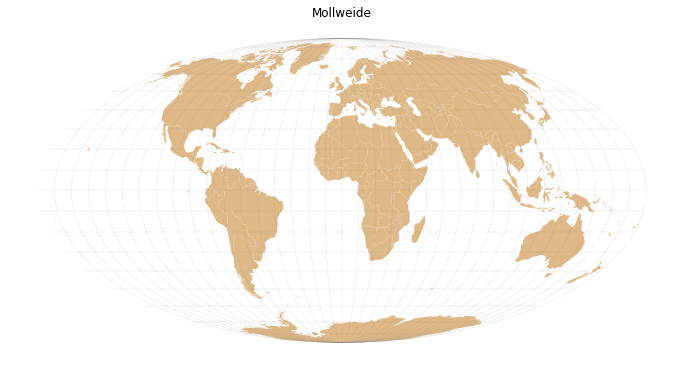

In [ ]:
plot_world_graticule('ESRI:54009', title='Mollweide')

In [ ]:
gdf_countries.to_crs('ESRI:54009').geometry.area.sum()

147078547875353.1

Robinson ('ESRI:54030')

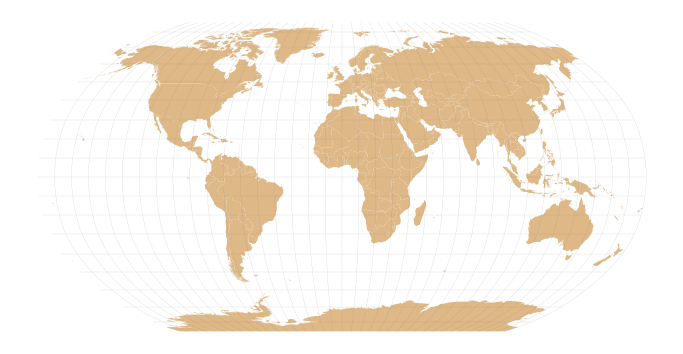

In [ ]:
plot_world_graticule('ESRI:54030')

In [ ]:
# demonstrate a pandas selection - Ukraine, area calculation
gdf_countries[gdf_countries.shapeName=='Ukraine'].to_crs('ESRI:54009').geometry.area / 1_000_000

185    597315.984304
dtype: float64

Ukraine area: 603 628 km²

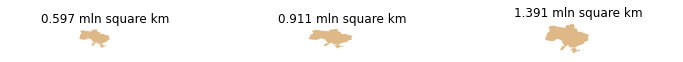

In [ ]:
# Displaying Greenland (or Ukraine) in different projections, in the same scale

list_epsg=['ESRI:54009', 'EPSG:32662', 'EPSG:3785']

fig, axs = plt.subplots(1, len(list_epsg), figsize=(len(list_epsg)*4,8))

for ax, epsg in zip(axs, list_epsg):
    gdf_cntr = gdf_countries[gdf_countries.shapeName=='Ukraine']
    gdf_cntr = gdf_cntr.to_crs(epsg)
    gdf_cntr.plot(ax=ax, color='burlywood', linewidth=0)
    ax.axis('off')
    ax.set_title(f'{round(gdf_cntr.geometry.area.values[0]/1_000_000_000_000, 3)} mln square km')
    ax.set_xlim(int(gdf_cntr.centroid.x) - 4_000_000, int(gdf_cntr.centroid.x) + 5_000_000)


In [ ]:
597/603

0.9900497512437811

distances on a plane - more difficult matter

In [ ]:
import shapely
from shapely.geometry import Point, LineString

# distance - from Kiev to New York
kiev_coordinates = (30.52, 50.45)
ny_coordinates = (-73.94, 40.76)

In [ ]:
point_kiev = Point(30.52, 50.45)
point_ny = Point(-73.94, 40.76)

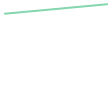

In [ ]:
linia = LineString([point_kiev, point_ny])
linia

In [ ]:
gdf_linia = gpd.GeoDataFrame(geometry=[linia], crs='epsg:4326')
print(gdf_linia.to_crs('ESRI:54009').geometry.length/1000, 
    gdf_linia.to_crs('EPSG:3857').geometry.length/1000)

0    8606.878728
dtype: float64 0    11730.961165
dtype: float64


In [ ]:
# TODO show whole geometry - then show how the segmentize work
gdf_linia.geometry

0    LINESTRING (30.52000 50.45000, -73.94000 40.76...
Name: geometry, dtype: geometry

The Azimuthal Equidistant (AEQD) projection is a type of map projection that portrays all points on the Earth's surface as equidistant from the center point, with distances measured accurately from that center point. Here are some characteristics and considerations of the Azimuthal Equidistant projection:

(f'+proj=aeqd +datum=WGS84 +units=m +lat_0=0.0 +lon_0=0.0')

In [ ]:
crs_orig_point = (f'+proj=aeqd +datum=WGS84 +units=m +lat_0={point_kiev.y} +lon_0={point_kiev.x}') #  full CRS definition
gdf_linia = gdf_linia.set_crs('EPSG:4326')
gdf_linia_custom = gdf_linia.to_crs(crs_orig_point)
gdf_linia_custom = shapely.segmentize(gdf_linia_custom, 1000) # important to add vertices
gdf_linia_custom.set_crs(crs_orig_point, inplace=True)
gdf_linia_custom.geometry.length/1000

0    7523.966254
dtype: float64

(-16202833.720475351,
 19309647.77733567,
 -18909718.27737411,
 18801850.650062174)

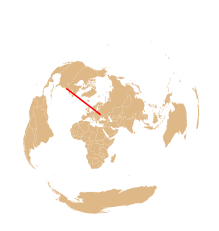

In [ ]:
# plot a kiev centred map
gdf_countries_azimut = gdf_countries.to_crs(crs_orig_point)
graticules_azimut = gdf_graticules.to_crs(crs_orig_point)

fig, ax = plt.subplots()
gdf_countries_azimut.plot(ax=ax, color='burlywood')
gdf_linia_custom.plot(ax=ax, color='red')
ax.axis('off')

how the great circles look in popular map projections?

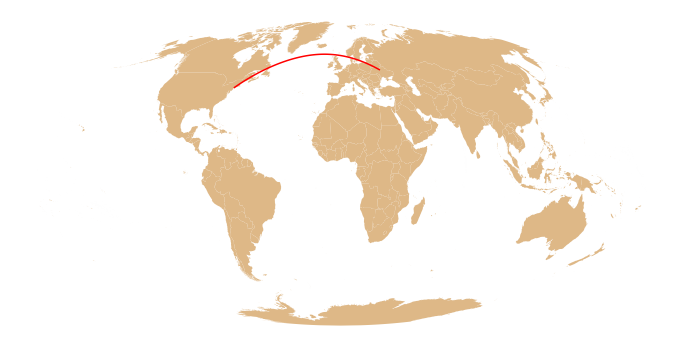

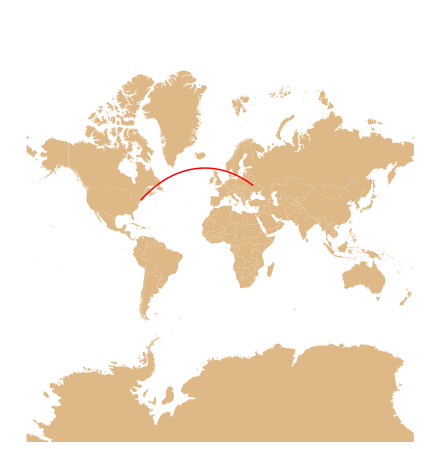

In [ ]:
crss = ['ESRI:54009', 'EPSG:3857']
for crs in crss:
    fig, ax = plt.subplots(figsize=(12,8))
    gdf_countries_moll = gdf_countries.to_crs(crs)
    gdf_countries_moll.plot(ax=ax, color='burlywood')
    gdf_linia_custom.to_crs(crs).plot(ax=ax, linewidth=1.5, color='red')
    ax.axis('off')
    if crs == 'EPSG:3857':
        ax.set_ylim(-20_000_000, 25_000_000)